<center><h1> Exploratory Data Analysis of cars dataset (Part 3)</h1></center>

***

<center><h2> Multivariate descriptive statistics </h2></center>

In [15]:
import set_jupyter_path
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from src.car_price_prediction.utils import dataset_manager
from numpy import median 

pd.set_option('float_format', '{:.3f}'.format)
sns.set(rc={'figure.figsize':(23,10)})

In [16]:
car_data = dataset_manager.get_cleaned_outliers_dataset()

Let's look at the data, and see what feateres  we can plot.

In [17]:
car_data.head()

,Url,Expiration,Year,Publication,Transmission,Brand,Model,Power,Capacity,Drive,Mileage,Wheel,Carcass,Fuel,Photo_Urls,Color,Price
0,https://cars.kg/offers/700020.html,Expired,1995.000,13.03.2017,NaN,mercedes-benz,NaN,300.000,3.200,задний,nan,NaN,седан,бензин,['https://i.cars.kg/preview/r/YvS--H_4B-BMdpVk...,темно-синий,3500
1,https://cars.kg/offers/700023.html,Expired,2006.000,13.03.2017,NaN,lexus,rx,268.000,3.300,постоянный полный,129000.000,NaN,внедорожник / пикап,бензин,['https://i.cars.kg/preview/r/WOpX4xBLlrC2oZNY...,серебряный,13100
2,https://cars.kg/offers/700033.html,Expired,2003.000,13.03.2017,NaN,toyota,ist,109.000,1.500,передний,122000.000,NaN,хэтчбек,бензин,['https://i.cars.kg/preview/r/3dFkV2XRYnV04GPZ...,серебряный,4500
3,https://cars.kg/offers/700038.html,Expired,2005.000,13.03.2017,NaN,mercedes-benz,viano,116.000,2.100,задний,251000.000,NaN,минивэн / бус,дизель,['https://i.cars.kg/preview/r/GfuJvEs6Wn9xNnQD...,бежевый,8700
4,https://cars.kg/offers/700039.html,Expired,1997.000,13.03.2017,NaN,audi,NaN,165.000,2.400,передний,nan,NaN,седан,бензин,['https://i.cars.kg/preview/r/B8qi5oqug16kMbJE...,серебряный,3200


We don't really need 'URL' column, so we are gonna drop it, and we are gonna modify 'Publication' and 'Photo Urls' columns, so they make sense when plotting.

In [18]:
car_data.drop(columns=['Url'], inplace=True)

Now it's time to do different kinds of multivariate plots, to see how the price changes depending on different features of the car. We are gonna modify publication column.

In [19]:
car_data.Publication = pd.to_datetime(car_data.Publication)
car_data.Publication = car_data.Publication.apply(lambda x: x and x.strftime("%Y-%m"))

We can see that in January of the 2018 median price of the car changed significantly, due to the law entered to the force by the government which increased the price of the cars.

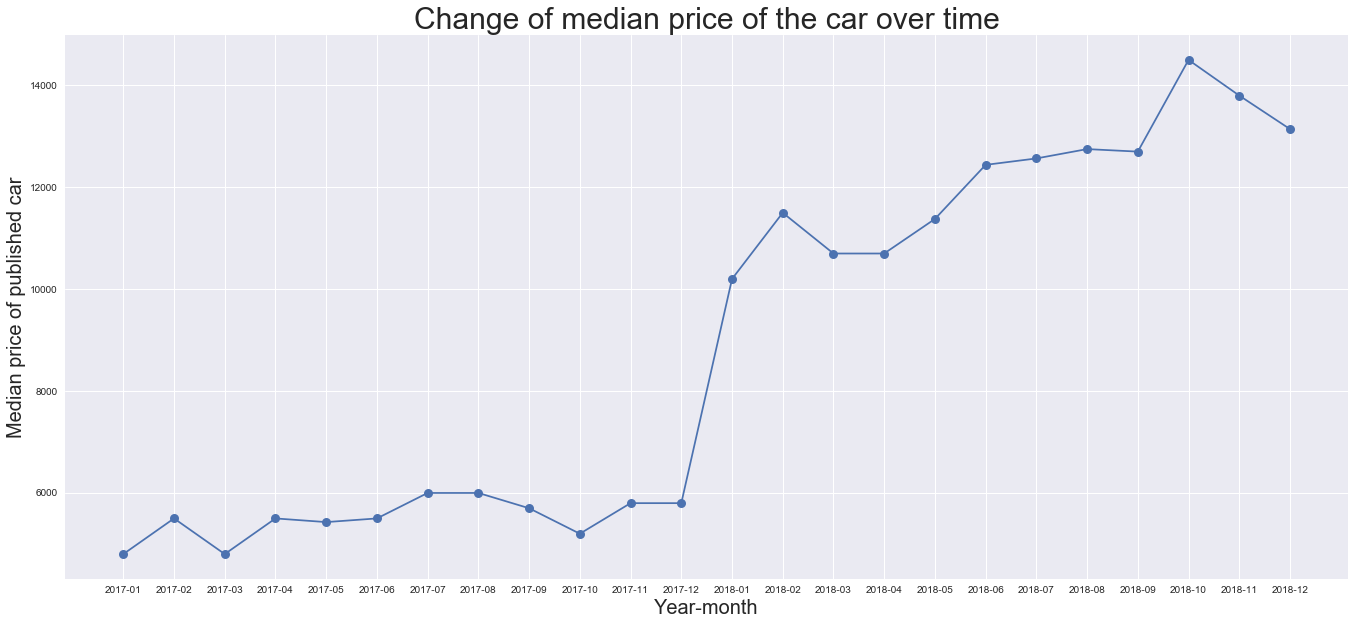

In [20]:
publication_price = car_data.groupby('Publication')['Price'].median()
plt.scatter(publication_price.index, publication_price, linewidths=2)
plt.plot(publication_price.index, publication_price)
plt.ylabel('Median price of published car', fontsize = 20)
plt.xlabel('Year-month', fontsize = 20)
plt.title('Change of median price of the car over time', fontsize = 30)
plt.show()

In the plot below, we don't really see a correlation between number of photos posted to the car advertisement and it's price, maybe a slight one when the number of photos exceeds 10. 

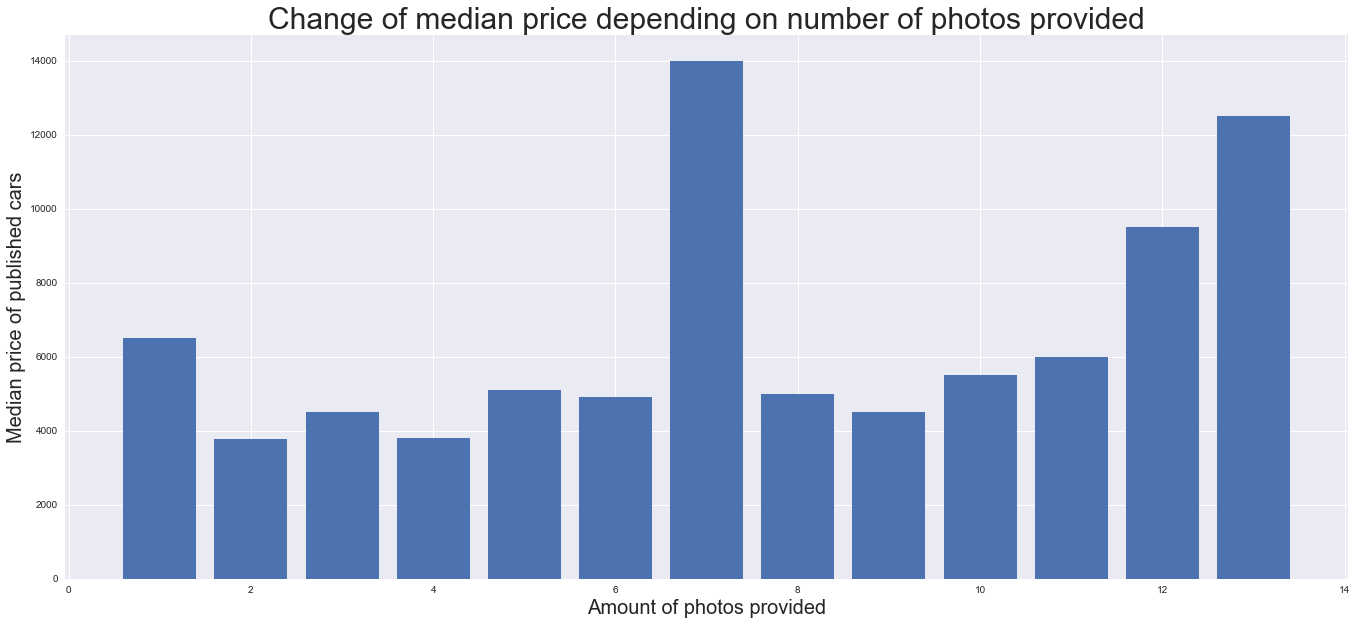

In [21]:
car_data.Photo_Urls = car_data.Photo_Urls.apply(lambda x: x and len(x.split(",")))
photos_prices = car_data.groupby('Photo_Urls')['Price'].median()
plt.bar(photos_prices.index, photos_prices)
plt.ylabel('Median price of published cars', fontsize = 20)
plt.xlabel('Amount of photos provided', fontsize = 20)
plt.title('Change of median price depending on number of photos provided', fontsize = 30)
plt.show()

Below you can see the plot showing, how the year of the car affects its price.
We can see clearly a strong correlation between the year of the car and it's median price. In the years 1960-1980 we can see a big variability, in my opinion, it's the effect of rarity cars. 

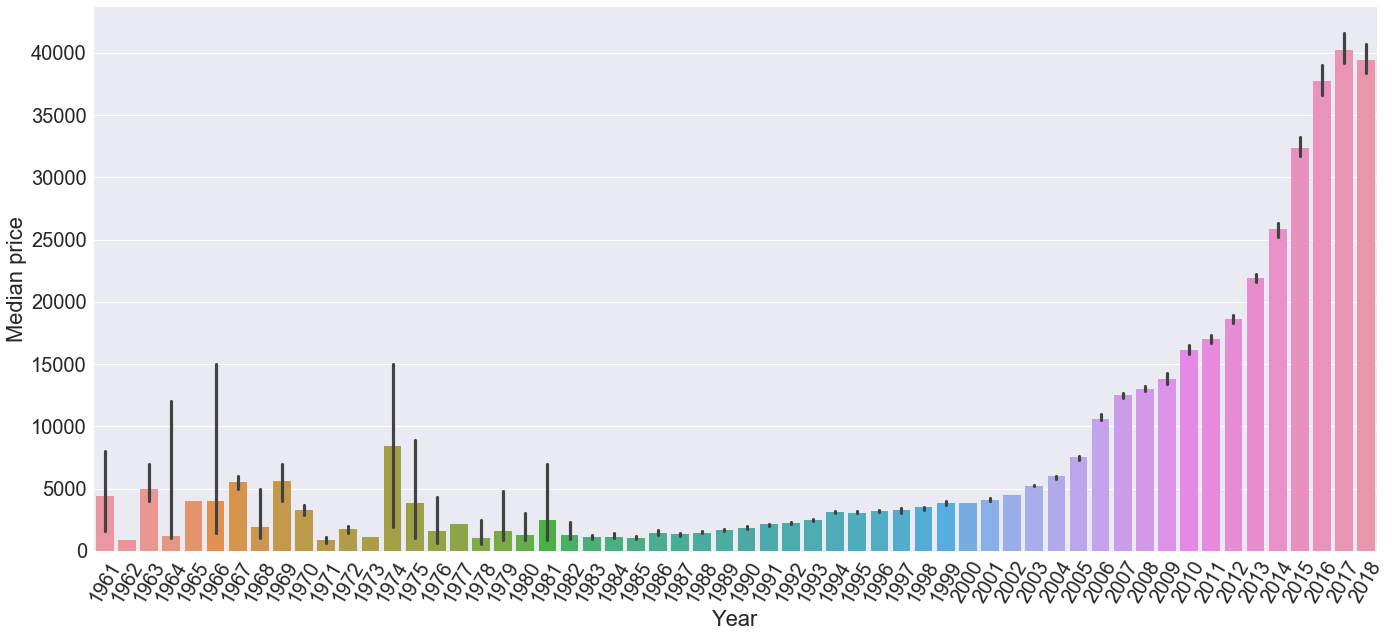

In [22]:
sns.set(font_scale=2)
sns.barplot(car_data.Year.dropna().apply(int), car_data.Price, estimator=median)
plt.xticks(rotation=60)
plt.ylabel('Median price')
plt.show()

Below we can see a barplot that shows how the price changes depending on the capacity of the car, we can see the clear correlation, with some slight outliers.

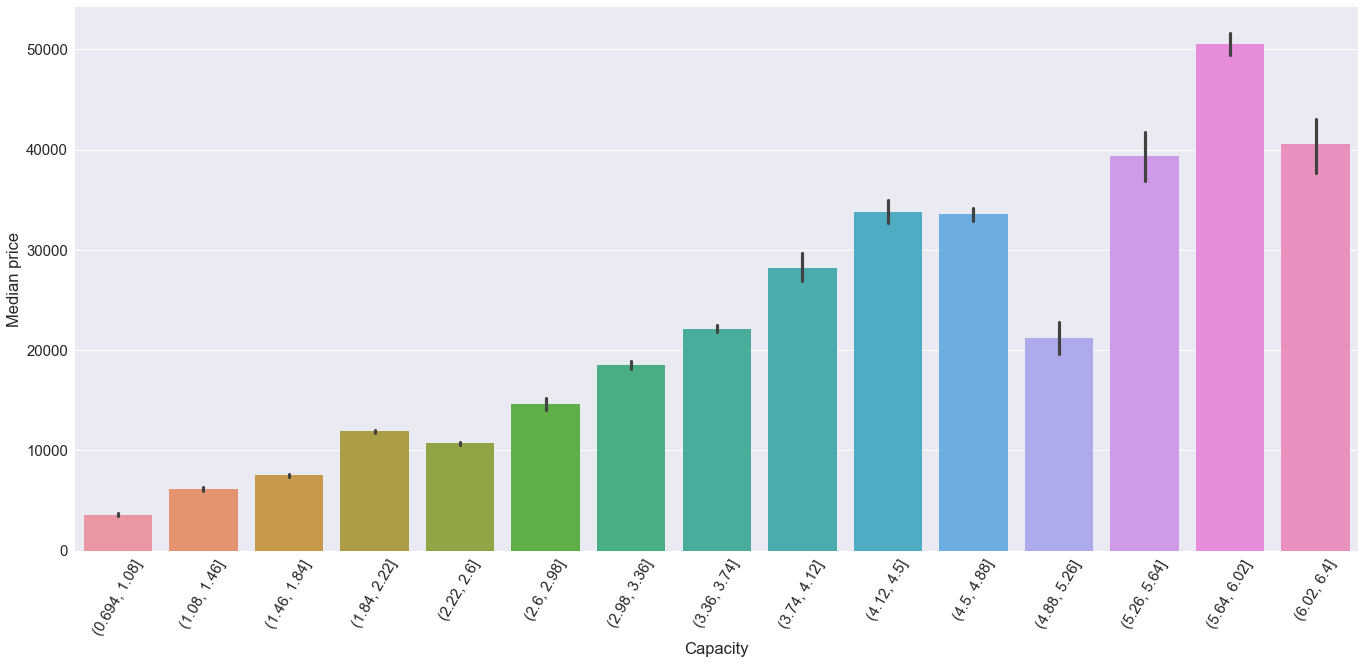

In [23]:
sns.set(font_scale=1.5)
sns.barplot(pd.cut(car_data.Capacity, bins=15), car_data.Price)
plt.xticks(rotation=60)
plt.ylabel('Median price')
plt.xlabel('Capacity')
plt.show()

Below we can see the price of the cars depending on the brand, at first glance we can see there are a lot of variability in some of the cars.

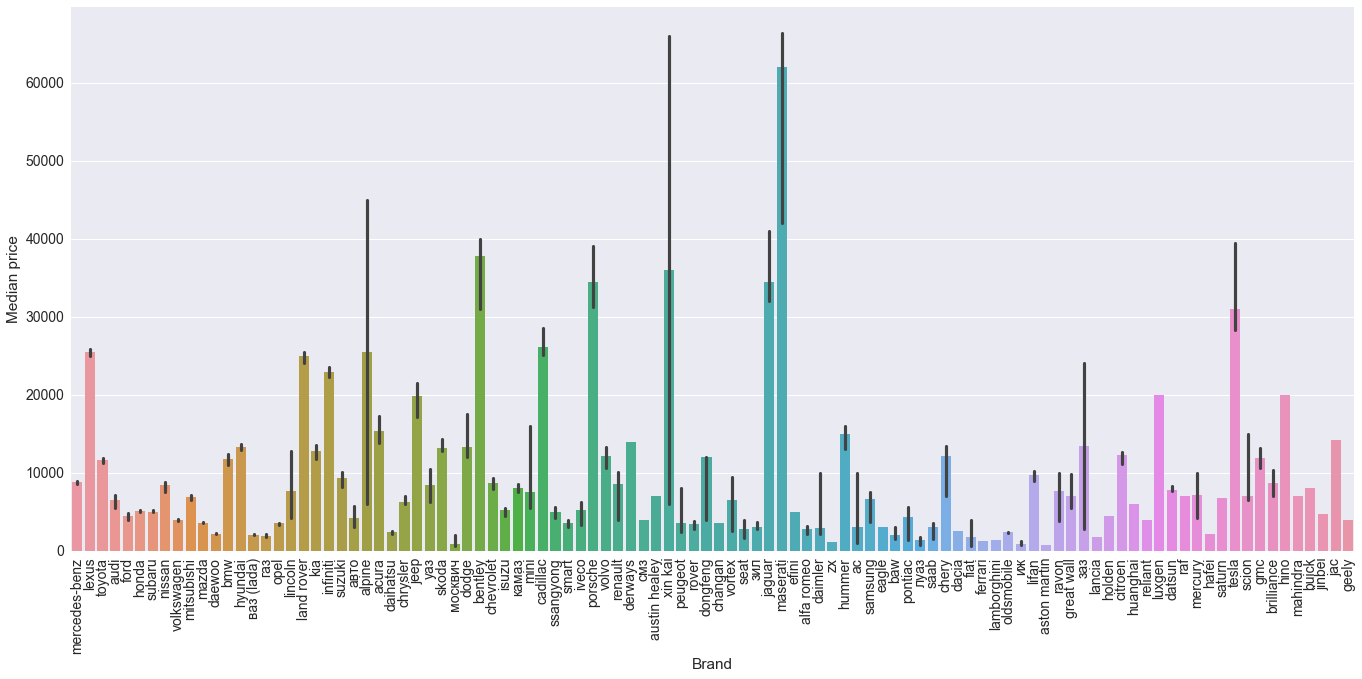

In [24]:
sns.set(font_scale=1.4)
sns.barplot(car_data.Brand, car_data.Price, estimator=median)
plt.xticks(rotation=90)
plt.ylabel('Median price')
plt.xlabel('Brand')
plt.show()

Now let's look at the examples with most variability. We can understand why 'xin kai' and 'alpine' were plotted this way, it's because it has only two samples which are very different from each other.

In [25]:
car_data.loc[car_data.Brand=='alpine']

,Expiration,Year,Publication,Transmission,Brand,Model,Power,Capacity,Drive,Mileage,Wheel,Carcass,Fuel,Photo_Urls,Color,Price
697,Expired,nan,2017-03,автомат,alpine,a610,nan,nan,NaN,nan,правый,универсал,бензин,1,NaN,6000
9536,Active,nan,2017-05,NaN,alpine,NaN,nan,nan,NaN,nan,NaN,NaN,NaN,1,NaN,45000


In [26]:
car_data.loc[car_data.Brand=='xin kai']

,Expiration,Year,Publication,Transmission,Brand,Model,Power,Capacity,Drive,Mileage,Wheel,Carcass,Fuel,Photo_Urls,Color,Price
3826,Expired,2014.000,2017-07,NaN,xin kai,NaN,nan,1.300,задний,100.000,левый,купе,бензин,1,серебряный,6000
72069,Active,2017.000,2018-09,NaN,xin kai,pickup x3,nan,nan,NaN,nan,NaN,седан,NaN,1,дипломат,66000


Here is the barplot of transmission types and their average price.

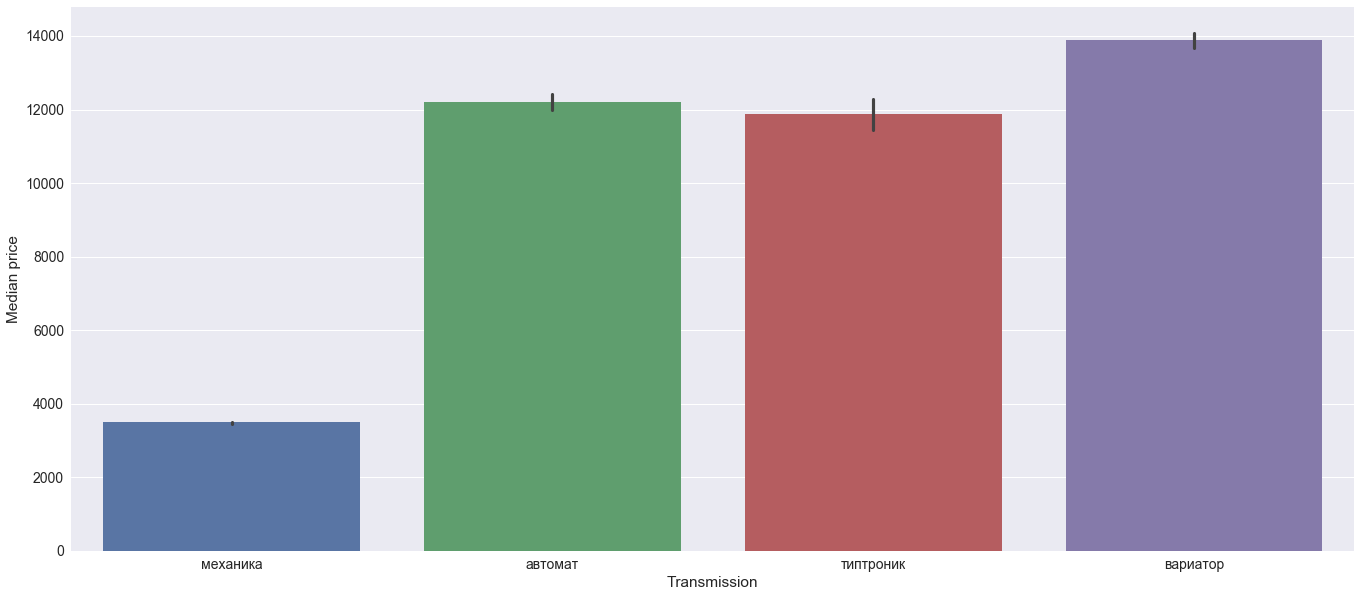

In [27]:
sns.set(font_scale=1.4)
sns.barplot(car_data.Transmission, car_data.Price, estimator=median)
plt.ylabel('Median price')
plt.xlabel('Transmission')
plt.show()

In the plot below we can see the plot of cars carcasses and their average prices, and not surpisingly off-road vehicles cost much more than any other.

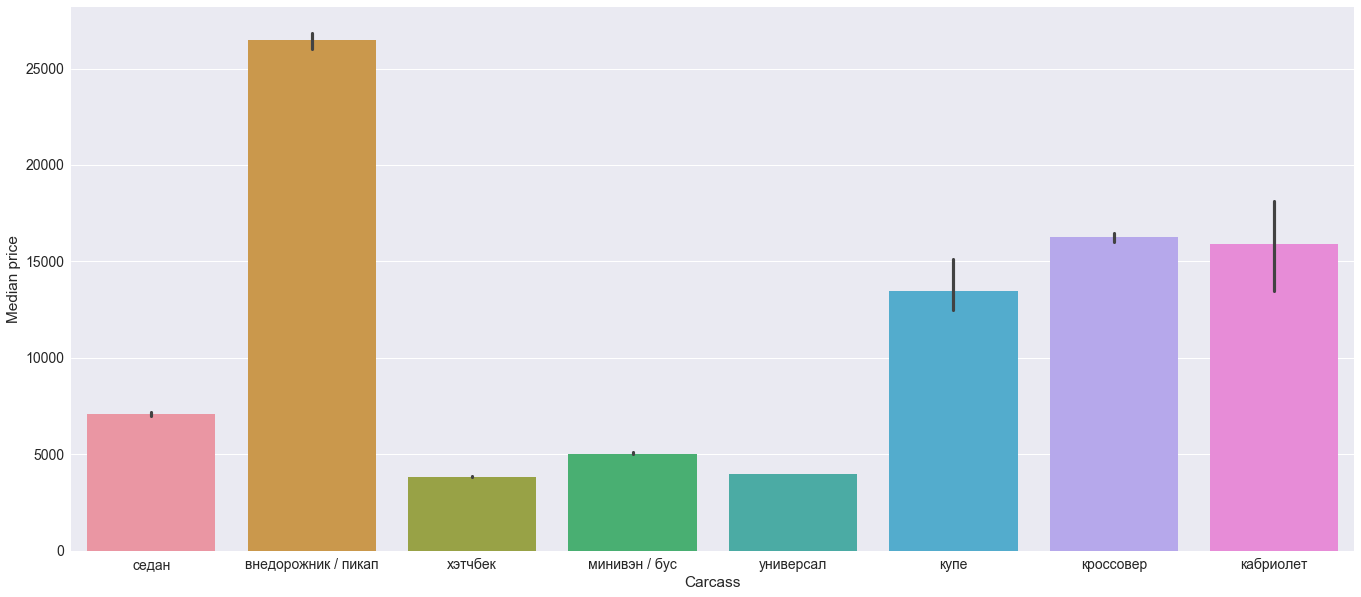

In [28]:
sns.set(font_scale=1.4)
sns.barplot(car_data.Carcass, car_data.Price, estimator=median)
plt.ylabel('Median price')
plt.xlabel('Carcass')
plt.show()

I am not sure why brown cars tend to have higher prices in Kyrgyzstan, but my hypothesis is that expensive cars tend to have more cars available in brown color, than the cheap ones. 

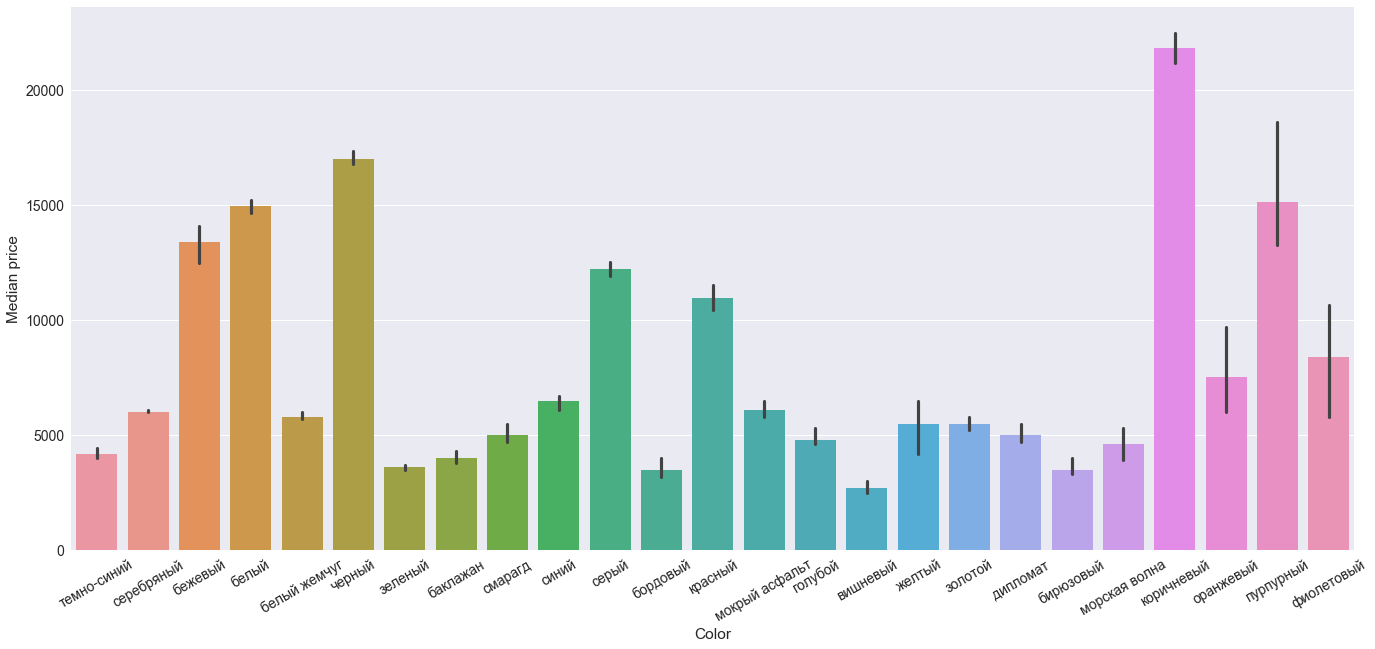

In [29]:
sns.set(font_scale=1.4)
sns.barplot(car_data.Color, car_data.Price, estimator=median)
plt.xticks(rotation=30)
plt.ylabel('Median price')
plt.xlabel('Color')
plt.show()

Here we can see that diesel cars tend to cost higher than the other types of fuel.

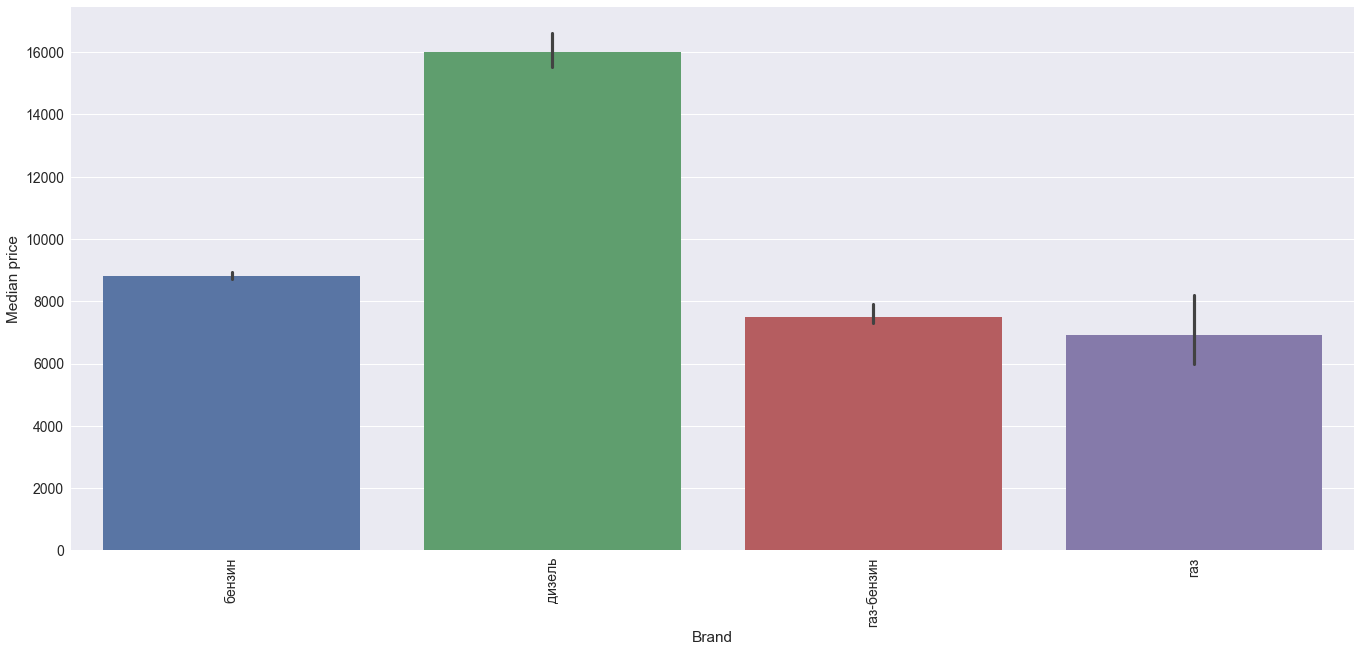

In [30]:
sns.set(font_scale=1.4)
sns.barplot(car_data.Fuel, car_data.Price, estimator=median)
plt.xticks(rotation=90)
plt.ylabel('Median price')
plt.xlabel('Brand')
plt.show()

Now it's time to see, which features of dataset are important and which are not so. I am going to use RandomForest Regressor module from scklearn library to analyze importance of features. Also, I wll use OneHotEncoder to make categorical features numeric.  
I will drop the NaN values for this example, because RandomForestRegressor doesn't take as an input data with missing values.
And also I will drop power column, because of several reasons:
* Power column is dependent from capacity column, we can see it above in correlation matrix, they are highly correlated.
* Most of the people in KG doesn't care about the power, but do about capacity, that's why there are a lot of NaN values in power column, and a lot of impossible values
* Later in notebooks, we will see that power column actually deteriorate prediction accuracy

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from src.car_price_prediction.utils import df_utils

car_data.dropna(inplace=True)
car_data.drop(columns = ["Power"], inplace = True)

In [33]:
X,y = df_utils.get_data_and_target(car_data)
X_dummies = pd.get_dummies(X)
forest = RandomForestRegressor(n_estimators=30)
feat_labels = X_dummies.columns[:-1]
forest.fit(X_dummies,y)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
    
print("Features sorted by their score:")
print(f"Rank\tImportance\tFeature")
for value, key in enumerate(sorted(zip(map(lambda x: round(x, 4), forest.feature_importances_),
                                       X_dummies.columns.values), reverse=True)):
    if key[0]!=0:
        print(f"{value+1}\t{key[0]}\t{key[1]}")

Features sorted by their score:
Rank	Importance	Feature
1	0.4302	Year
2	0.3086	Capacity
3	0.1096	Mileage
4	0.0231	Brand_mercedes-benz
5	0.0108	Model_s-класс
6	0.0076	Model_lx
7	0.006	Brand_porsche
8	0.0055	Model_g-класс
9	0.0045	Drive_передний
10	0.0042	Carcass_внедорожник / пикап
11	0.0042	Brand_lexus
12	0.0029	Brand_toyota
13	0.0027	Brand_bmw
14	0.0022	Fuel_бензин
15	0.0022	Drive_постоянный полный
16	0.0021	Photo_Urls
17	0.0021	Model_land cruiser prado
18	0.002	Model_gx
19	0.0019	Model_rx
20	0.0019	Brand_nissan
21	0.0018	Model_range rover
22	0.0018	Model_7 серия
23	0.0017	Publication_2018-02
24	0.0016	Model_911
25	0.0016	Carcass_кроссовер
26	0.0014	Publication_2018-04
27	0.0014	Model_ls
28	0.0014	Fuel_дизель
29	0.0013	Publication_2018-09
30	0.0013	Publication_2017-06
31	0.0013	Model_i8
32	0.0013	Model_camry
33	0.0013	Color_черный
34	0.0012	Model_panamera
35	0.0012	Color_белый
36	0.0011	Publication_2017-04
37	0.0011	Carcass_седан
38	0.0011	Carcass_минивэн / бус
39	0.001	Drive_задний
4

It is the end of our Exploritary Data Analysis, now with the understanding of our data we can clean data and make model for prediction.